<a href="https://colab.research.google.com/github/ceydaa02/my-works/blob/main/Urban_Sounds_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# URBAN SOUNDS CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import sys
import glob

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/spectrograms-20221005T123024Z-001/spectrograms

/content/gdrive/MyDrive/spectrograms-20221005T123024Z-001/spectrograms


**1.PREPROCESSING THE HISTOGRAM IMAGES**

In [ ]:
path = [glob.glob("0/*.png"), glob.glob("1/*.png"), glob.glob("2/*.png"), glob.glob("3/*.png"), glob.glob("4/*.png"), glob.glob("5/*.png"), 
        glob.glob("6/*.png"), glob.glob("7/*.png"), glob.glob("8/*.png"), glob.glob("9/*.png")]
images = []
labels = []
for i in range(0,10):
  for file in path[i]:
    img = cv2.imread(file, 0)

    resized_image = cv2.resize(img, (256,256))
#    resultimage = np.zeros((800, 800))
#    normalized_image = cv2.normalize(resized_image,resultimage, 0, 100, cv2.NORM_MINMAX)

  # cv2_imshow(img)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
    images.append(resized_image)
    labels.append(i)


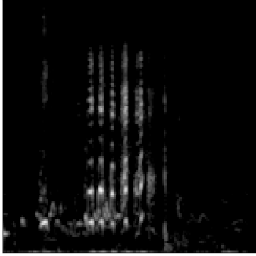

label of 2053th data : 2
Shape of the data: (256, 256)


In [ ]:
from pandas.core.arrays.floating import Float64Dtype
from google.colab.patches import cv2_imshow
cv2_imshow(images[2053])
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f'label of 2053th data : {data.label[2053]}')
print(f'Shape of the data: {data.image[2053].shape}')

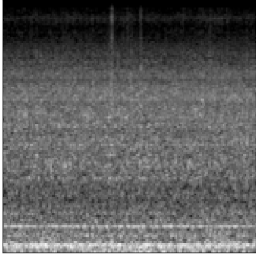

In [ ]:
cv2_imshow(images[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

**SPLITTING**

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temporary, y_train, y_temporary = train_test_split(images, labels, train_size = 0.8)

X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size = 0.5)

In [ ]:
print(f'Lenghts of the dataset : {len(X)}')
print(f'Lenghts of the training dataset : {len(X_train)}')
print(f'Lenghts of the validation dataset : {len(X_val)}')
print(f'Lenghts of the testing dataset : {len(X_test)}')

Lenghts of the dataset : 8732
Lenghts of the training dataset : 6985
Lenghts of the validation dataset : 873
Lenghts of the testing dataset : 874


In [ ]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

**2.CONSTRUCTING A CNN MODEL**

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, 
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation = "relu",
                                 input_shape = (256, 256, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation = "relu"))



model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

#model.add(tf.keras.layers.Dense(64, activation = "relu"))
#model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics="accuracy")

**TRAINING THE MODEL**

In [ ]:
results = model.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = (X_val, y_val))

In [ ]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

In [ ]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()